<a href="https://colab.research.google.com/github/Sylwiaes/seaborn-plotly-course/blob/main/seaborn/seaborn_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Churn Modelling
przewidujemy odejście klienta z firmy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/kaggle+/churn_modelling/Telco-Customer-Churn.csv'
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Wstępne przetworzenie danych-preprocessing

In [3]:
TotalChargesMedian = df[df.TotalCharges != ' ']['TotalCharges'].astype('float32').median() #filtrujemy wszystkie dane, które nie mają spacji
#sprawdzenie, gdzie df.TotalCharges jest różne od spacji
#wyciągamy z tego kolumnę TotalCharges
#astype-konwertujemy to na zmienną typu float
#obliczamy medianę na tym obiekcie

In [4]:
df['TotalCharges'][df['TotalCharges'] == ' '] = TotalChargesMedian
#wycinamy kolumnę, którą chcemy zmienić, czyli TotalChanrges i szukamy danych, gdzie df jest równy spacji
df['TotalCharges'] = df['TotalCharges'].astype('float32') #ustawianie danych jako typ float32

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
if not df.isnull().sum().sum(): #sprawdzenie, czy nie ma braków danych
    print('Nie ma braków.')

Nie ma braków.


In [7]:
df.isnull().sum() #drugi sposób na sprawdzenie braków danych

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#nadajemy zmienne, które chcemy mieć jako kategoryczne i jako numeryczne:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
               'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'Contract', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Churn']
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

#konwertujemy dane typu object jako kategoryczne i numeryczne:
for col in categorical: 
    df[col] = pd.Categorical(df[col]) #zmieniamy przy pomocy pętli dane dla każdego atrybutu
    
for col in numerical: 
    df[col] = df[col].astype('float32')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   float32 
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [9]:
df = df.drop(columns=['customerID']) #zmienną customerID usuwamy, bo jest dla nas zbędna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   float32 
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

In [10]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371147,64.761826,2281.915039
std,24.559708,30.089973,2265.270752
min,0.000000,18.250000,18.799999
25%,9.000000,35.500000,402.225006
50%,29.000000,70.349998,1397.475098
75%,55.000000,89.849998,3786.599976
max,72.000000,118.750000,8684.799805


In [11]:
df.describe(include=['category']) #statystyki tylko dla zmiennych kategorycznych

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


### Rozkład Churn

No     5174
Yes    1869
Name: Churn, dtype: int64


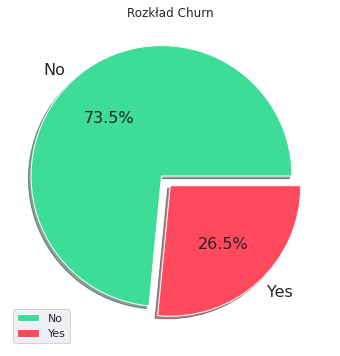

In [12]:
plt.figure(figsize=(8, 6)) #przy każdym wywołaniu metody plot jest tworzony element figure na którym ustawiamy dane, w tym przypadku ustawiamy rozmiar obiektu
sns.set() #ustawiamy styl z biblioteki seaborn
#obliczamy rozkład wartości przy pomocy value_counts i przedstawiamy za pomocą wykresu kołowego:
df.Churn.value_counts().plot(kind='pie',
                            fontsize=16,
                            colors=['#3DDC97', '#FF495C'],
                            explode=[0.1, 0],
                            shadow=True,
                            autopct='%1.1f%%')
#parametr explode wycina wykresy i przesuwa
#shadow nadaje cień
#autopct ustawia format danych
plt.legend() #ustawiamy legendę
plt.ylabel('') #ususwamy label pionowy
plt.title('Rozkład Churn') #nadajemy tytuł wykresu
print(df.Churn.value_counts()) #pomocniczo przedstawiamy rozkład

No     5174
Yes    1869
Name: Churn, dtype: int64


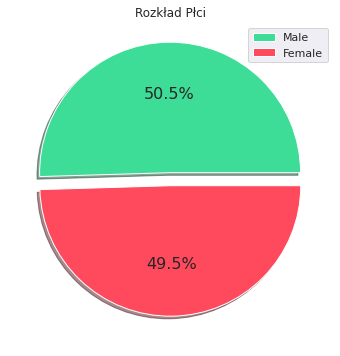

In [13]:
plt.figure(figsize=(8, 6))
sns.set()
#rysujemy wykres w podziale na płeć
df.gender.value_counts().plot(kind='pie',
                            fontsize=16,
                            labels=['', ''], #usuwa labels z wykresu
                            colors=['#3DDC97', '#FF495C'],
                            explode=[0.1, 0],
                            shadow=True,
                            autopct='%1.1f%%')
plt.legend(['Male', 'Female'])
plt.ylabel('')
plt.title('Rozkład Płci')
print(df.Churn.value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


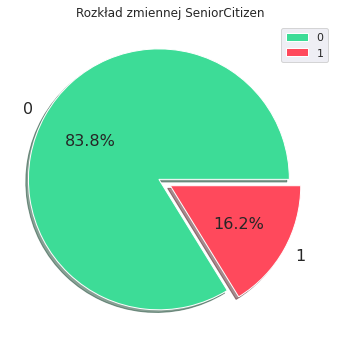

In [14]:
plt.figure(figsize=(8, 6))
#rysujemy wykres kołowy zmiennej SeniorCitizen
df.SeniorCitizen.value_counts().plot(kind='pie',
                            fontsize=16,
                            colors=['#3DDC97', '#FF495C'],
                            explode=[0.1, 0],
                            shadow=True,
                            autopct='%1.1f%%')
plt.legend()
plt.ylabel('')
plt.title('Rozkład zmiennej SeniorCitizen')
print(df.Churn.value_counts())

### Rozkłady

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


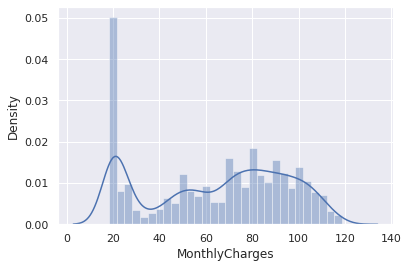

In [15]:
sns.distplot(df.MonthlyCharges, bins=30) #przekazujemy dane dla których chcemy narysować wykres, bins-liczba słupków

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


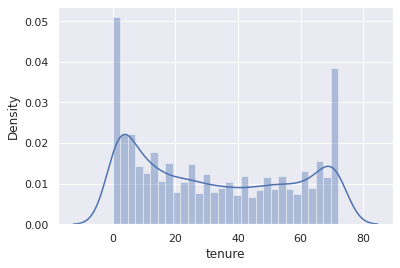

In [16]:
sns.distplot(df.tenure, bins=30) #rozkład zmiennej tenure, czyli czas ile dana osoba jest naszym klientem

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


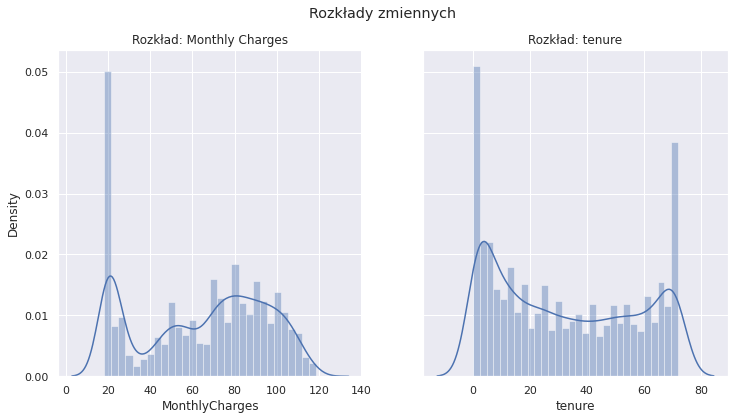

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 6)) #przekazujemy liczbę wiekszy i kolumn, sharey-wykresy dzielą tę samą oś y
sns.distplot(df.MonthlyCharges, bins=30, ax=ax[0]) #ax-parametr oznaczający oś, ustawiamy oś na pierwszym elemencie
sns.distplot(df.tenure, bins=30, ax=ax[1])

fig.suptitle('Rozkłady zmiennych')
#Tytuły dla wybranych wykresów, przypisujemy do wybranej osi
ax[0].title.set_text('Rozkład: Monthly Charges')
ax[1].title.set_text('Rozkład: tenure')

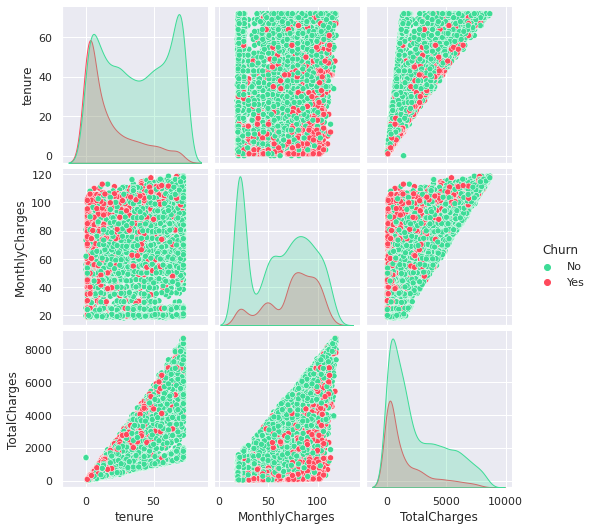

In [18]:
sns.pairplot(data=df, vars=['tenure', 'MonthlyCharges', 'TotalCharges'],
            hue='Churn', palette=['#3DDC97', '#FF495C'])

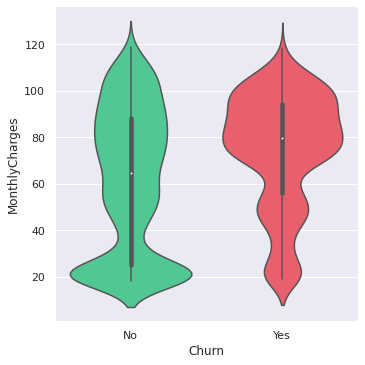

In [19]:
sns.catplot(data=df, x='Churn', y='MonthlyCharges',
           kind='violin', palette=['#3DDC97', '#FF495C'])

### Macierz Korelacji

In [20]:
df.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.825464
MonthlyCharges,0.247900,1.000000,0.650864
TotalCharges,0.825464,0.650864,1.000000


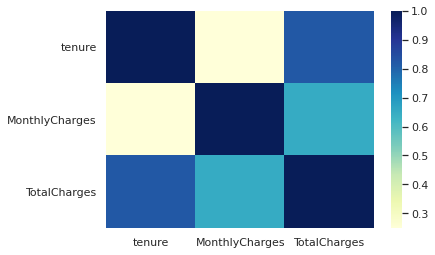

In [ ]:
sns.heatmap(df.corr(), cmap="YlGnBu")